## Setup and Import Libraries

In [44]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestClassifier
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


# Load and Inspect Data

In [ ]:
# Load the Data
data=pd.read_csv("fraud_detection_credit_card_small.csv")

In [5]:
# Dispay the information
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,is_fraud,merch_zipcode,Merchant_Category,Transaction_Type,Customer_Satisfaction_Score,Transaction_Time,Customer_Age,Payment_Method,Loyalty_Points_Earned
0,1045211,2020-03-09 15:09:26,577588686219,fraud_Towne LLC,misc_pos,194.51,James,Strickland,M,25454 Leonard Lake,...,-78.865012,0,15909.0,Electronics,In-store,6,11:10,69,Debit Card,332
1,547406,2019-08-22 15:49:01,30376238035123,fraud_Friesen Ltd,health_fitness,52.32,Cynthia,Davis,F,7177 Steven Forges,...,-123.636337,0,NaN,Entertainment,Online,8,20:42,47,Mobile Payment,476
2,110142,2019-03-04 01:34:16,4658490815480264,fraud_Mohr Inc,shopping_pos,6.53,Tara,Richards,F,4879 Cristina Station,...,-78.898190,0,15961.0,Restaurants,Online,3,05:19,69,Debit Card,100
3,1285953,2020-06-16 20:04:38,3514897282719543,fraud_Gaylord-Powlowski,home,7.33,Steven,Faulkner,M,841 Cheryl Centers Suite 115,...,-76.542384,0,NaN,Restaurants,Online,4,06:12,31,Mobile Payment,460
4,271705,2019-05-14 05:54:48,6011381817520024,"fraud_Christiansen, Goyette and Schamberger",gas_transport,64.29,Kristen,Allen,F,8619 Lisa Manors Apt. 871,...,-104.092324,0,82082.0,Clothing,In-store,5,01:01,44,Mobile Payment,372


#### Transaction Details:
- trans_date_trans_time: Timestamp of the transaction.
- cc_num: Credit card number (anonymized).
- merchant: Merchant name where the transaction occurred.
- category: Merchant category.
- amt: Transaction amount.
- trans_num: Unique transaction identifier.
- unix_time: UNIX timestamp of the transaction.

#### Customer Information:
- first and last: Customer's first and last name (anonymized).
- gender: Gender of the customer.
- street, city, state, zip: Address information.
- lat and long: Latitude and longitude of the customer's location.
- city_pop: Population of the customer’s city.
- job: Customer's profession.
- dob: Date of birth.
- Customer_Age: Age derived from the dob.

#### Merchant Details:
- merch_lat and merch_long: Latitude and longitude of the merchant’s location.
- merch_zipcode: ZIP code of the merchant (some data missing).

#### Fraud Detection:
- is_fraud: Indicator if the transaction was fraudulent (1 for fraud, 0 for legitimate).

#### Enriched Features:
- Merchant_Category: Mock merchant categories (e.g., Groceries, Electronics).
- Transaction_Type: Online or in-store transactions.
- Customer_Satisfaction_Score: Score from 1 to 10 representing customer satisfaction.
- Transaction_Time: Transaction time in HH:MM format.
- Payment_Method: Payment method (e.g., Credit Card, Debit Card, Mobile Payment).
- Loyalty_Points_Earned: Loyalty points earned in the transaction.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   100000 non-null  int64  
 1   trans_date_trans_time        100000 non-null  object 
 2   cc_num                       100000 non-null  int64  
 3   merchant                     100000 non-null  object 
 4   category                     100000 non-null  object 
 5   amt                          100000 non-null  float64
 6   first                        100000 non-null  object 
 7   last                         100000 non-null  object 
 8   gender                       100000 non-null  object 
 9   street                       100000 non-null  object 
 10  city                         100000 non-null  object 
 11  state                        100000 non-null  object 
 12  zip                          100000 non-null  int64  
 13  

In [8]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,Customer_Satisfaction_Score,Customer_Age,Loyalty_Points_Earned
count,1.000000e+05,1.000000e+05,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,84824.000000,100000.000000,100000.000000,100000.00000
mean,6.496177e+05,4.144106e+17,70.09797,48877.432690,38.545307,-90.281210,8.926183e+04,1.349288e+09,38.545636,-90.279953,0.005980,46887.518297,5.499790,44.001260,249.69798
std,3.738727e+05,1.304972e+18,141.31813,26889.271339,5.066987,13.772041,3.057107e+05,1.282166e+07,5.101331,13.782535,0.077099,25828.527963,2.872995,15.254164,144.64268
min,1.300000e+01,6.041621e+10,1.00000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.031242,-166.655425,0.000000,1002.000000,1.000000,18.000000,0.00000
25%,3.259925e+05,1.800400e+14,9.63750,26237.000000,34.690200,-96.809400,7.430000e+02,1.338821e+09,34.761914,-96.923129,0.000000,25124.750000,3.000000,31.000000,125.00000
50%,6.494685e+05,3.518759e+15,47.56000,48174.000000,39.354300,-87.591700,2.457000e+03,1.349299e+09,39.357916,-87.476149,0.000000,45881.000000,6.000000,44.000000,249.00000
75%,9.735372e+05,4.642255e+15,82.84000,72042.000000,41.940400,-80.175200,2.032800e+04,1.359462e+09,41.952371,-80.289363,0.000000,68050.000000,8.000000,57.000000,375.00000
max,1.296673e+06,4.992346e+18,9092.75000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.397018,-66.963918,1.000000,99403.000000,10.000000,70.000000,500.00000


In [9]:
# Check for the missing data
data.isnull().sum()

Unnamed: 0                         0
trans_date_trans_time              0
cc_num                             0
merchant                           0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
city                               0
state                              0
zip                                0
lat                                0
long                               0
city_pop                           0
job                                0
dob                                0
trans_num                          0
unix_time                          0
merch_lat                          0
merch_long                         0
is_fraud                           0
merch_zipcode                  15176
Merchant_Category                  0
Transaction_Type                   0
Customer_Satisfaction_Score        0
T

# Preprocessing

In [11]:
# Drop unnescesary data columns
data=data.drop(columns=["Unnamed: 0"])

In [12]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,merch_zipcode,Merchant_Category,Transaction_Type,Customer_Satisfaction_Score,Transaction_Time,Customer_Age,Payment_Method,Loyalty_Points_Earned
0,2020-03-09 15:09:26,577588686219,fraud_Towne LLC,misc_pos,194.51,James,Strickland,M,25454 Leonard Lake,Spring Church,...,-78.865012,0,15909.0,Electronics,In-store,6,11:10,69,Debit Card,332
1,2019-08-22 15:49:01,30376238035123,fraud_Friesen Ltd,health_fitness,52.32,Cynthia,Davis,F,7177 Steven Forges,Sixes,...,-123.636337,0,NaN,Entertainment,Online,8,20:42,47,Mobile Payment,476
2,2019-03-04 01:34:16,4658490815480264,fraud_Mohr Inc,shopping_pos,6.53,Tara,Richards,F,4879 Cristina Station,Keisterville,...,-78.898190,0,15961.0,Restaurants,Online,3,05:19,69,Debit Card,100
3,2020-06-16 20:04:38,3514897282719543,fraud_Gaylord-Powlowski,home,7.33,Steven,Faulkner,M,841 Cheryl Centers Suite 115,Farmington,...,-76.542384,0,NaN,Restaurants,Online,4,06:12,31,Mobile Payment,460
4,2019-05-14 05:54:48,6011381817520024,"fraud_Christiansen, Goyette and Schamberger",gas_transport,64.29,Kristen,Allen,F,8619 Lisa Manors Apt. 871,Lagrange,...,-104.092324,0,82082.0,Clothing,In-store,5,01:01,44,Mobile Payment,372


# Visualization

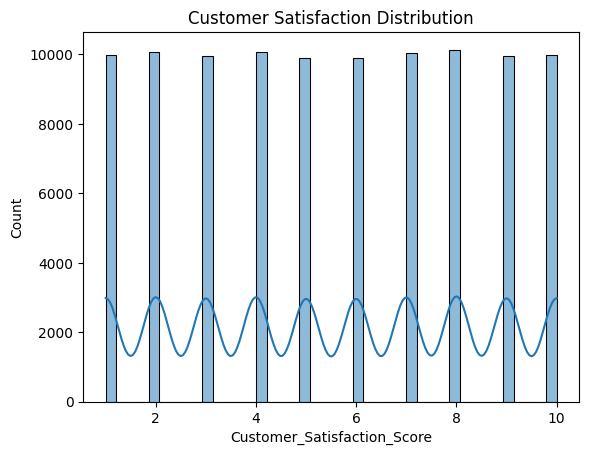

In [15]:
# Attrition trends
sns.histplot(data['Customer_Satisfaction_Score'], kde=True)
plt.title("Customer Satisfaction Distribution")
plt.show()

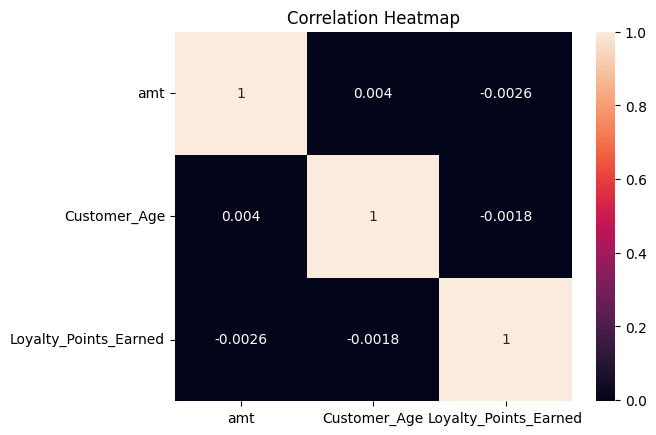

In [16]:
# Relationships (Heatmap and Pairplot)
sns.heatmap(data[['amt', 'Customer_Age', 'Loyalty_Points_Earned']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

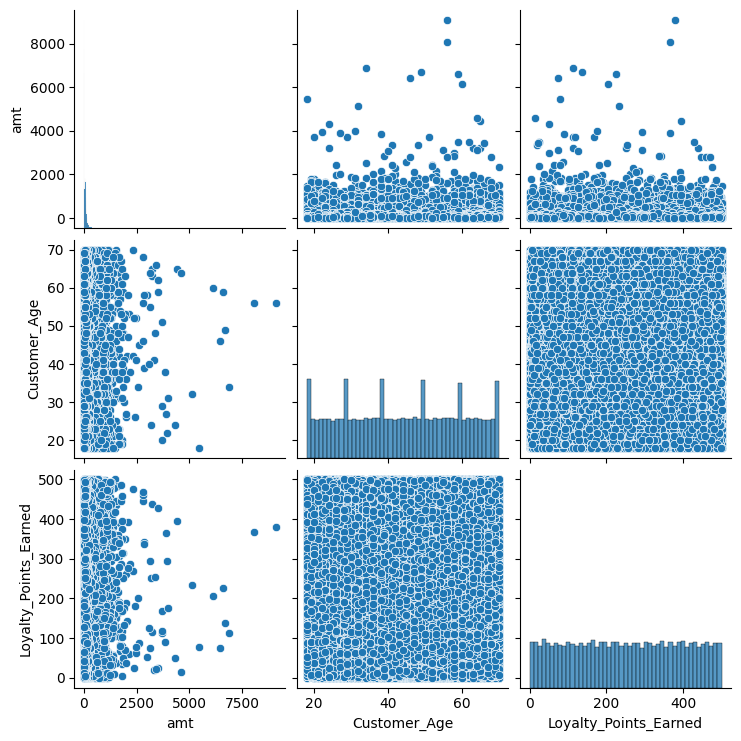

In [17]:
sns.pairplot(data[['amt', 'Customer_Age', 'Loyalty_Points_Earned']])
plt.show()

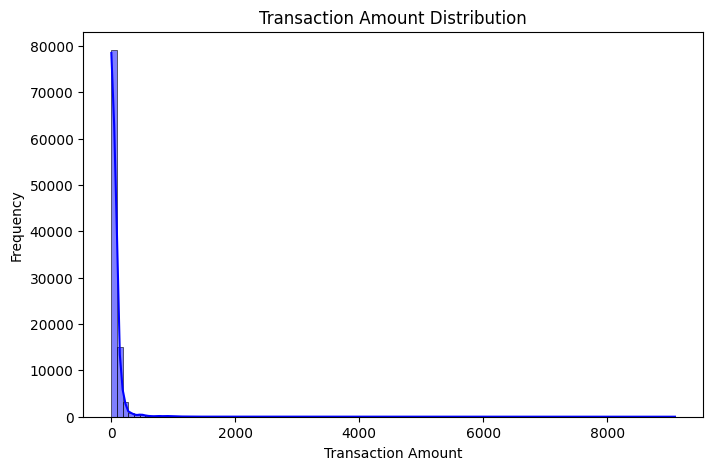

In [18]:
# Distribution of Transaction Amounts
plt.figure(figsize=(8, 5))
sns.histplot(data['amt'], bins=100, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

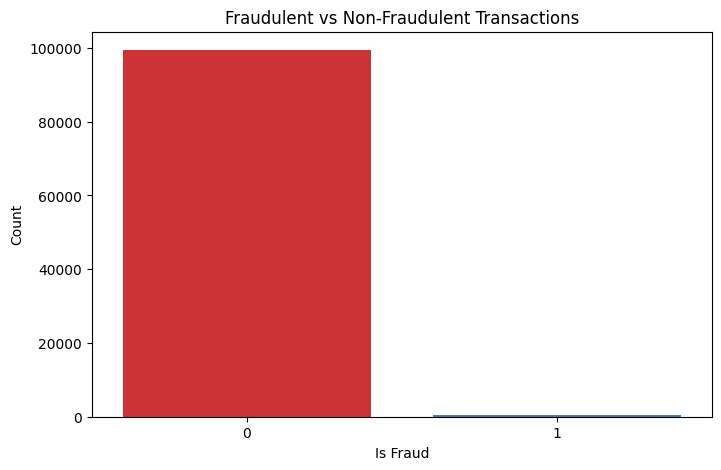

In [19]:
# Fraud vs Non-Fraud Transactions
plt.figure(figsize=(8, 5))
sns.countplot(x='is_fraud', data=data, palette='Set1')
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

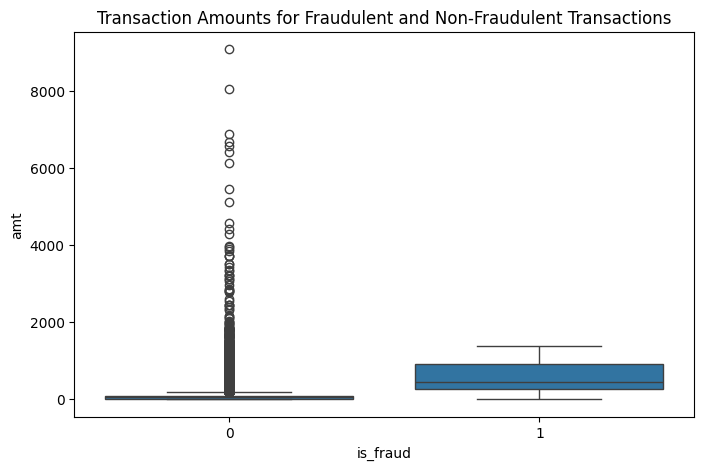

In [20]:
# Transaction Amounts for Fraudulent and Non-Fraudulent Transactions
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fraud', y='amt', data=data)
plt.title('Transaction Amounts for Fraudulent and Non-Fraudulent Transactions')
plt.show()

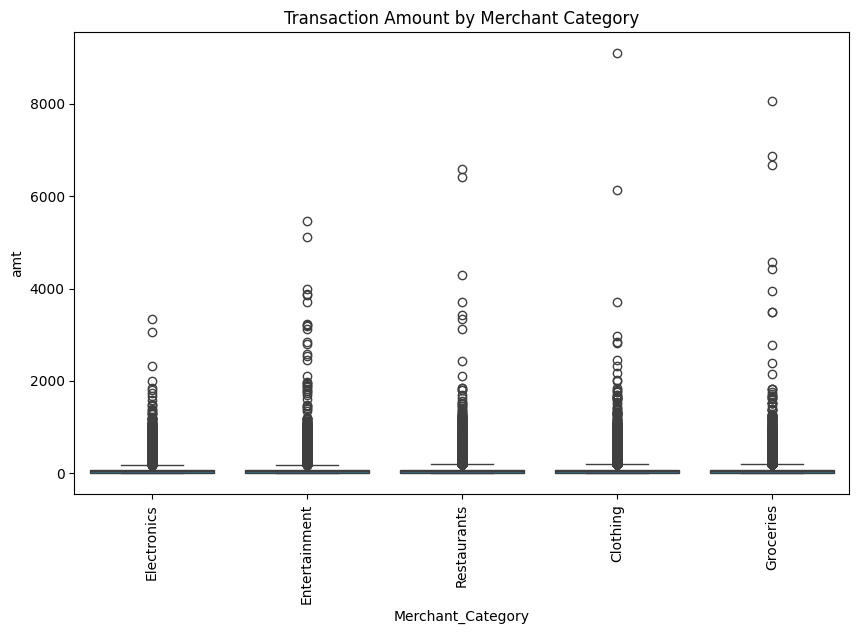

In [21]:
# Transaction Amount by Merchant Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Merchant_Category', y='amt', data=data)
plt.xticks(rotation=90)
plt.title("Transaction Amount by Merchant Category")
plt.show()

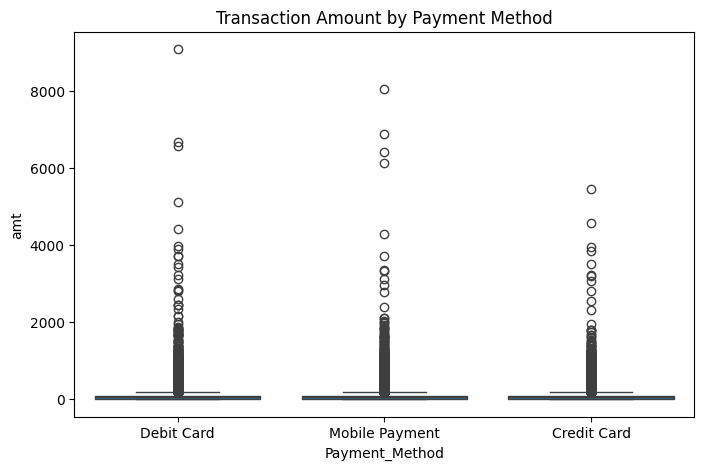

In [22]:
# Transaction Amount by Payment Method
plt.figure(figsize=(8, 5))
sns.boxplot(x='Payment_Method', y='amt', data=data)
plt.title("Transaction Amount by Payment Method")
plt.show()

# Clustering

In [26]:
# Preprocessing
data_cluster = data[['amt', 'Customer_Age', 'Loyalty_Points_Earned']].dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

In [27]:
# K-means clustering
inertia = []
for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scaled)
    inertia.append(model.inertia_)

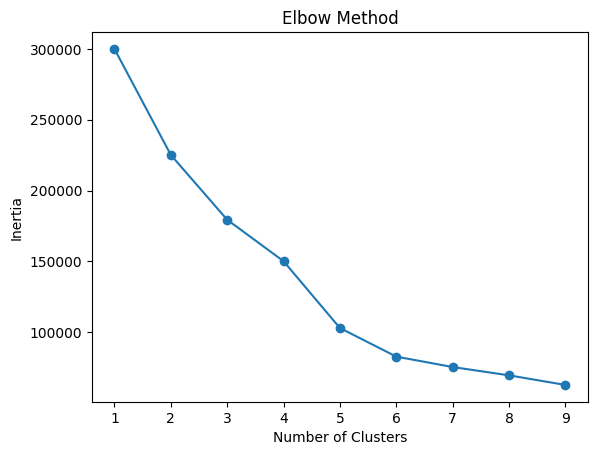

In [28]:
# Elbow method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [29]:
# Apply K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_

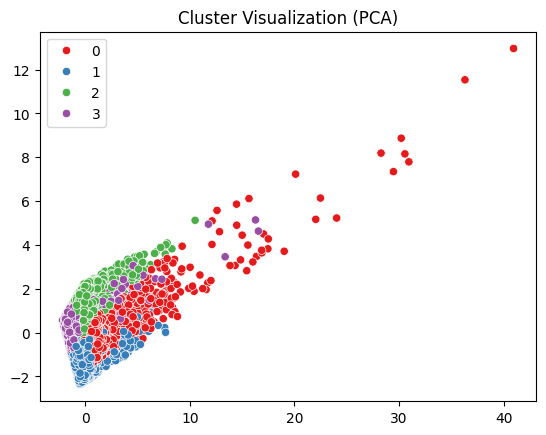

In [30]:
# Visualize clusters with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='Set1')
plt.title("Cluster Visualization (PCA)")
plt.show()

# Regression

In [32]:
# Preprocessing
X = data[['Customer_Age', 'Loyalty_Points_Earned']]
y = data['amt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [35]:
# Evaluate
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 19620.5509342864
R2 Score: -4.068219102348891e-05


# Classification

# Encode categorical features using LabelEncoder

In [39]:
le = LabelEncoder()

In [40]:
data['Payment_Method_encoded'] = le.fit_transform(data['Payment_Method'].astype(str))
data['Merchant_Category_encoded'] = le.fit_transform(data['Merchant_Category'].astype(str))

In [41]:
X = data[['Customer_Age', 'amt', 'Payment_Method_encoded', 'Merchant_Category_encoded']]
y = data['is_fraud']

In [42]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
# Evaluate
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29789    29]
 [  145    37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29818
           1       0.56      0.20      0.30       182

    accuracy                           0.99     30000
   macro avg       0.78      0.60      0.65     30000
weighted avg       0.99      0.99      0.99     30000

